In [14]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('/Users/dyanni3/ML_ex1/all_stocks_1yr.csv')

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [5]:
stock_names=np.unique(df['Name'])
print(stock_names)

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC' 'APD'
 'APH' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA'
 'BAC' 'BAX' 'BBT' 'BBY' 'BCR' 'BDX' 'BEN' 'BF.B' 'BHF' 'BHGE' 'BIIB' 'BK'
 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'C' 'CA' 'CAG' 'CAH' 'CAT'
 'CB' 'CBG' 'CBOE' 'CBS' 'CCI' 'CCL' 'CELG' 'CERN' 'CF' 'CFG' 'CHD' 'CHK'
 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI' 'CMS'
 'CNC' 'CNP' 'COF' 'COG' 'COH' 'COL' 'COO' 'COP' 'COST' 'COTY' 'CPB' 'CRM'
 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL'
 'DD' 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DISH' 'DLPH'
 'DLR' 'DLTR' 'DOV' 'DOW' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'DXC'
 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX'

In [101]:
ADS=df[df['Name']=='ADS'].Close
USB=df[df['Name']=='USB'].Close

In [102]:
USB.head()

113617    42.73
113618    42.98
113619    43.02
113620    43.22
113621    43.22
Name: Close, dtype: float64

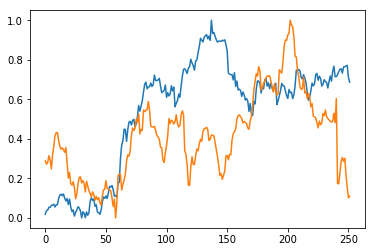

In [103]:
plt.plot(c2)
plt.plot(cl)

In [104]:
scl = MinMaxScaler()
#Scale the data
c2 = USB.reshape(USB.shape[0],1)
c2 = scl.fit_transform(c2)

In [105]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(c2,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

195
49
195
49


In [106]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)

Train on 195 samples, validate on 49 samples
Epoch 1/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1368 - val_loss: 0.0038
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0356 - val_loss: 0.0019
Epoch 3/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.0272
Epoch 4/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0021
Epoch 5/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0037
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 7/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0026
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 9/100
195/195 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 10/100
195/195 [========================

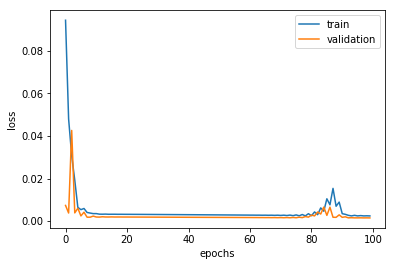

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])

In [96]:
#We see this is pretty jumpy but we will keep it at 300 epochs. With more data, it should smooth out the loss
#Lets look at the fit
Xt = model.predict(X_test)
Xtr=model.predict(X_train)
#plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
#plt.plot(scl.inverse_transform(Xt))

/Users/dyanni3/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/dyanni3/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


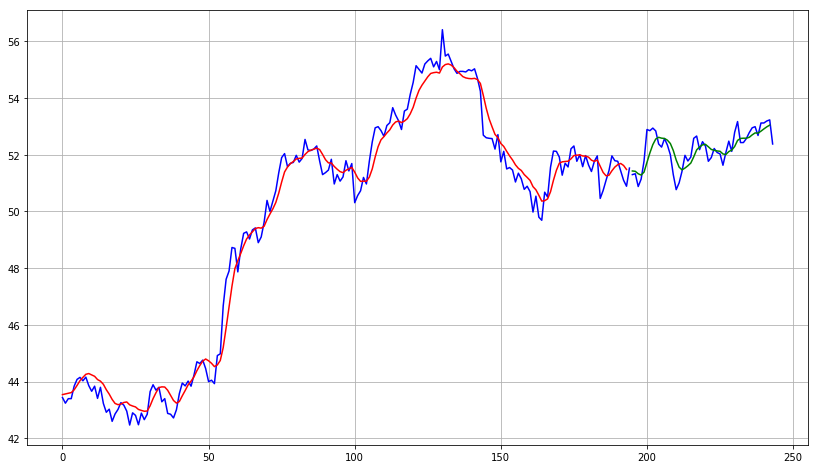

In [100]:
train_range=np.arange(len(y_train))
test_range=np.arange(len(y_train),len(y_train)+len(y_test))
plt.figure(figsize=(14,8))
plt.plot(train_range,scl.inverse_transform(y_train),'b')
plt.plot(test_range,scl.inverse_transform(y_test),'b')
plt.plot(test_range[:-1],scl.inverse_transform(Xt)[1:],'g')
plt.plot(train_range[:-1],scl.inverse_transform(Xtr)[1:],'r')
plt.grid()


In [97]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')